## https://drive.google.com/file/d/1mLArUTNJW21xOocRuLoRjoqttIplmupB/view?usp=sharing

In [ ]:
!pip install contractions
!pip install emoji

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk import pos_tag
from collections import Counter
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

import contractions
import emoji

from sklearn.model_selection import train_test_split



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Download stopwords and WordNet Lemmatizer (ensure you have NLTK data)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("/content/Imdb - data_imdb.csv")

In [ ]:
# Show the first few rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
# Checking for Duplicates in the dataset
df.duplicated().sum()

np.int64(419)

In [ ]:
# Handling Duplicates in the dataset
df.drop_duplicates(inplace=True)

In [ ]:
# Expand Contractions
def expand_contractions(text):
    return contractions.fix(text)


In [ ]:
# Handle Emojis
def handle_emojis(text):
    return emoji.demojize(text)

In [ ]:
# Normalize Repeated Characters
def normalize_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1\1', text)  # Reduce repeated characters to two


In [ ]:
# Clean the text
def clean_text(review):

    # Lowercasing
    review = review.lower()

    # Expand contractions
    review = expand_contractions(review)

    # Remove HTML tags
    review = BeautifulSoup(review, "html.parser").get_text()

    # Handle emojis
    review = handle_emojis(review)

    # Remove punctuation and special characters
    review = re.sub(r'[^a-zA-Z\s]', '', review)

    # Normalize repeated characters
    review = normalize_repeated_chars(review)

    # Tokenization
    words = word_tokenize(review)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 1]

    # Handle Negations
    words = [word.replace("not", "not_") for word in words]  # For example, "not good" becomes "not_good"

    # Lemmatization with POS tagging
    pos_tags = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word, pos in pos_tags]  # Verb lemmatization

    return ' '.join(words)

In [ ]:
!pip install swifter
import nltk
import pandas as pd
import swifter  # For faster apply

# Function to check and download NLTK resources
def download_nltk_resources():
    resources = ['averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng']
    for resource in resources:
        try:
            nltk.data.find(f'taggers/{resource}/{resource}.pickle')
        except LookupError:
            nltk.download(resource, quiet=True)  # Suppressing download messages

# Call the function to download necessary resources
download_nltk_resources()

# Faster text processing using swifter
df['cleaned_review'] = df['review'].swifter.apply(clean_text)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=54af6a63594efabb86107d239a94afc97b4698c1bfaaec92d19e30bec10a3c45
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


Pandas Apply:   0%|          | 0/49581 [00:00<?, ?it/s]

In [ ]:
# Show the first few cleaned reviews
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mention watch oz episode hook ri...  
1  wonderful little production film technique una...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter matteis love time money visually stun f...  


In [ ]:
# Step 7: Remove Rare Words
word_counts = Counter(" ".join(df['cleaned_review']).split())
rare_words = set([word for word, count in word_counts.items() if count < 5])
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))


In [ ]:
# Step 8: Prepare for Modeling
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Optional: Save the cleaned data
df.to_csv('cleaned_IMDB_Dataset.csv', index=False)

# Future Steps for Modeling
# For LSTM/GRU/CNN, we have to prepare the data into sequences and pad them accordingly.


#Data Visualization

Sentiment Visualization(Not really required here becuase there is exactly 25k positive and negative reviews each.)

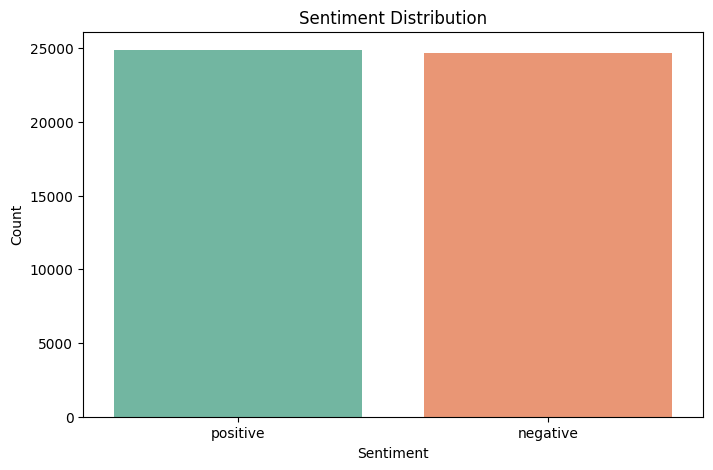

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Word Cloud Visualization(Creating word clouds for positive and negative reviews to visualize commonly used words.)

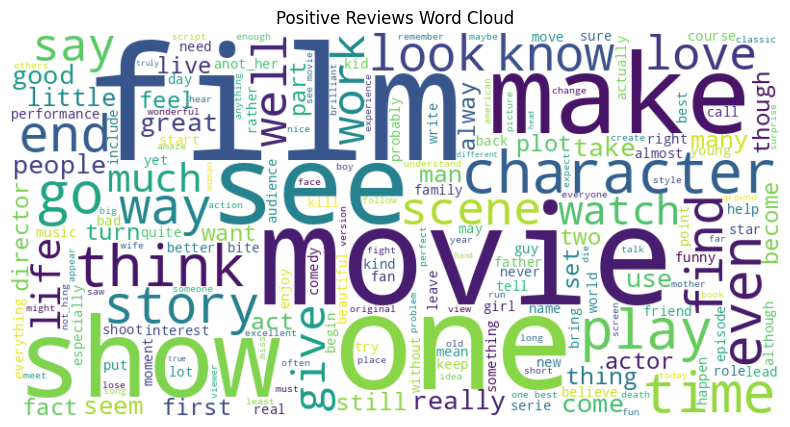

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()


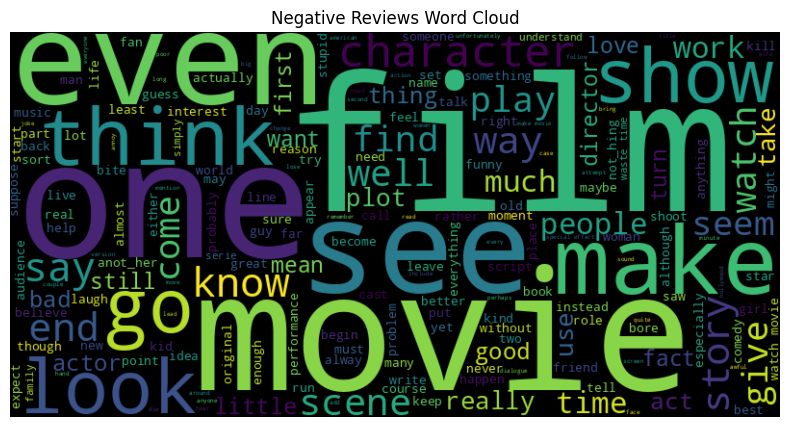

In [ ]:
# Generate word cloud for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


#Text Data Analysis

Common Words in Sentiments(Identifying common words used in positive and negative reviews.)

In [ ]:
from collections import Counter
import string

# Function to get most common words
def most_common_words(reviews, n=10):
    # Convert all reviews to lowercase and remove punctuation
    cleaned_reviews = reviews.lower().translate(str.maketrans('', '', string.punctuation))

    # Split the reviews into words
    words = cleaned_reviews.split()

    # Filter out any single-character words or unwanted characters
    words = [word for word in words if len(word) > 1]

    return Counter(words).most_common(n)


In [ ]:
# Get most common words for positive and negative sentiments
positive_words = most_common_words(positive_reviews)
negative_words = most_common_words(negative_reviews)

print("Most common words in positive reviews:", positive_words)
print("Most common words in negative reviews:", negative_words)


Most common words in positive reviews: [('film', 48863), ('movie', 35860), ('one', 25630), ('see', 21225), ('make', 20066), ('like', 19370), ('get', 15994), ('time', 15382), ('good', 14297), ('character', 13568)]
Most common words in negative reviews: [('movie', 47050), ('film', 42627), ('one', 24376), ('make', 23546), ('like', 23206), ('get', 19166), ('see', 19114), ('would', 17678), ('even', 14922), ('go', 14689)]


Review Length Analysis(Analyzing the length of reviews to see if there's any correlation between review length and sentiment.)

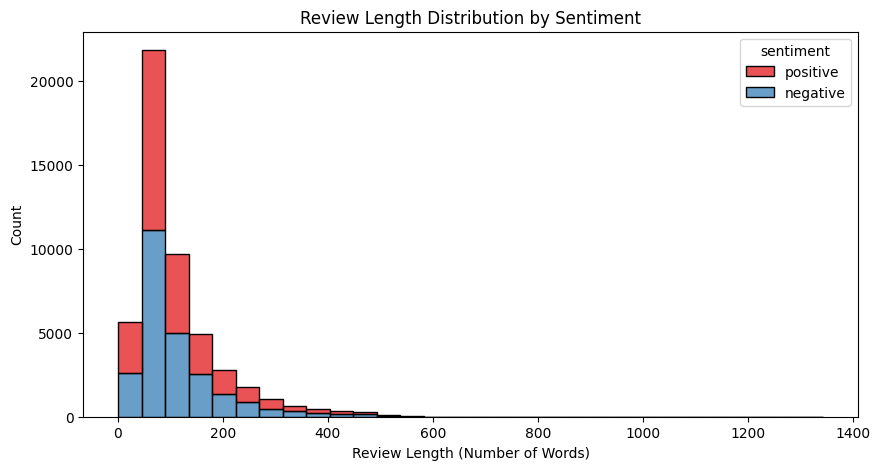

In [ ]:
# Calculate review lengths
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='review_length', hue='sentiment', multiple='stack', bins=30, palette='Set1')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Count')
plt.show()


#Traditional Machine Learning Models

##Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Step 2: Split data into train and test sets
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})  # Adjust mapping based on your dataset
X = df['cleaned_review']  # Use the cleaned reviews for modeling
y = df['label']


In [ ]:
X

,cleaned_review
0,one reviewers mention watch oz episode hook ri...
1,wonderful little production film technique una...
2,think wonderful way spend time hot summer week...
3,basically family little boy jake think zombie ...
4,matteis love time money visually stun film wat...
...,...
49995,think movie right good job creative original f...
49996,bad plot bad dialogue bad act idiotic direct a...
49997,catholic teach parochial elementary school nun...
49998,go disagree previous comment side maltin one s...


In [ ]:
y

,label
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
# Splitting our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Vectorizing text using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Unique labels in target variable: {0, 1}


<ipython-input-33-4c9ea5fd227e>:11: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(X_train_tfidf[:, 0].toarray() / (1 - X_train_tfidf[:, 0].toarray()))


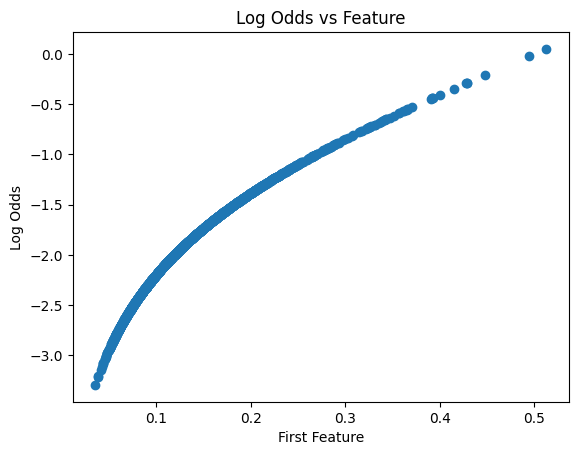

In [ ]:
# Step 4: Check assumptions on the training data

# 1. Binary or Dichotomous Dependent Variable
print("Unique labels in target variable:", set(y_train))  # Should be {0, 1} for binary classification

# 2. Independence of Observations
# This is more a design issue, ensuring that data collection was done properly.

# 3. Linearity of the Logit (for one feature as an example) ( We have to check this again after fitting the model)
#(To get a broader sense, we can pick the top N important features based on their weights in the logistic regression model and visualize their relationship with the log-odds:)
log_odds = np.log(X_train_tfidf[:, 0].toarray() / (1 - X_train_tfidf[:, 0].toarray()))
plt.scatter(X_train_tfidf[:, 0].toarray(), log_odds)
plt.xlabel('First Feature')
plt.ylabel('Log Odds')
plt.title('Log Odds vs Feature')
plt.show()


In [ ]:
# 4. Multicollinearity (Check VIF)
#The following lines of codes take a lot of time to compute:
X_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
print(vif_data[vif_data["VIF"] > 10])  # Check for high VIF values (VIF > 10 indicates multicollinearity)


KeyboardInterrupt: 

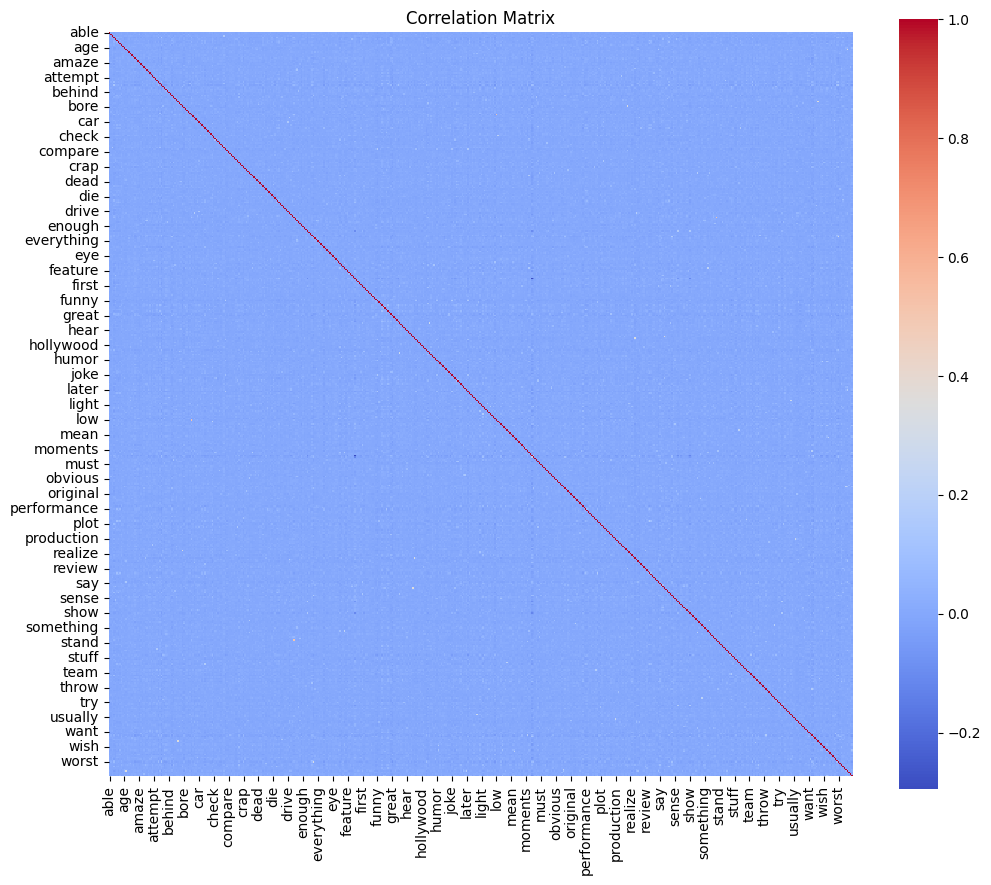

Highly correlated features: []


In [ ]:
# 4. Multicollinearity Check (Using Correlation Matrix)
# Convert the sparse matrix to a dense DataFrame
X_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Calculate the correlation matrix
correlation_matrix = X_train_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# Optionally, you can look for high correlation values
threshold = 0.9
high_corr_var = np.where(correlation_matrix > threshold)
high_corr_var_pairs = [(X_train_df.columns[x], X_train_df.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated features:", high_corr_var_pairs)


The multicollinearity check using the correlation matrix did not find any highly correlated features, which is a positive sign for our model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Sample size check
num_predictors = X_train_tfidf.shape[1]
num_samples = X_train_tfidf.shape[0]
ratio = num_samples / num_predictors
print(f'Sample to Predictor Ratio: {ratio:.2f}')  # Should ideally be > 10


Sample to Predictor Ratio: 79.33


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit model using sklearn
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions (for Cook's Distance)
y_pred_train = lr_model.predict(X_train_tfidf)
y_pred_prob_train = lr_model.predict_proba(X_train_tfidf)[:, 1]  # Get probabilities


In [ ]:
# Add intercept for statsmodels
X_train_sm = sm.add_constant(X_train_tfidf.toarray())  # Add a constant for intercept

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.341748
         Iterations 8


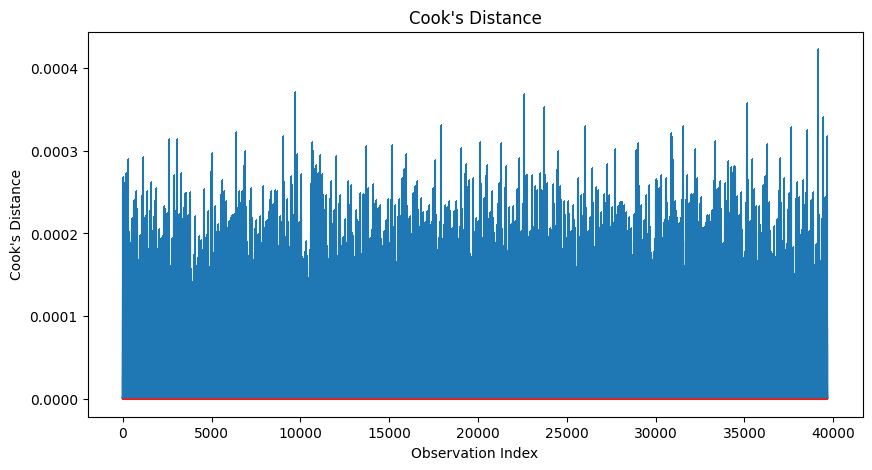

In [ ]:
# Get influence measures for Cook's Distance
influence = logit_results.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

plt.show()

Our sample-to-predictor ratio of approximately 79.33 is quite good, as it exceeds the recommended ratio of 10, indicating we have a sufficient sample size relative to the number of predictors.
There are no clear outliers since there are no extremely high Cook's Distance values that stand out dramatically from the rest. This suggests that there are no individual data points overly influencing the model.

In [ ]:

# Make predictions and evaluate the model
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 83.85%
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4995
           1       0.82      0.86      0.84      4922

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



Checking log-linearity assumption after fitting model. Used visualization and also Box-

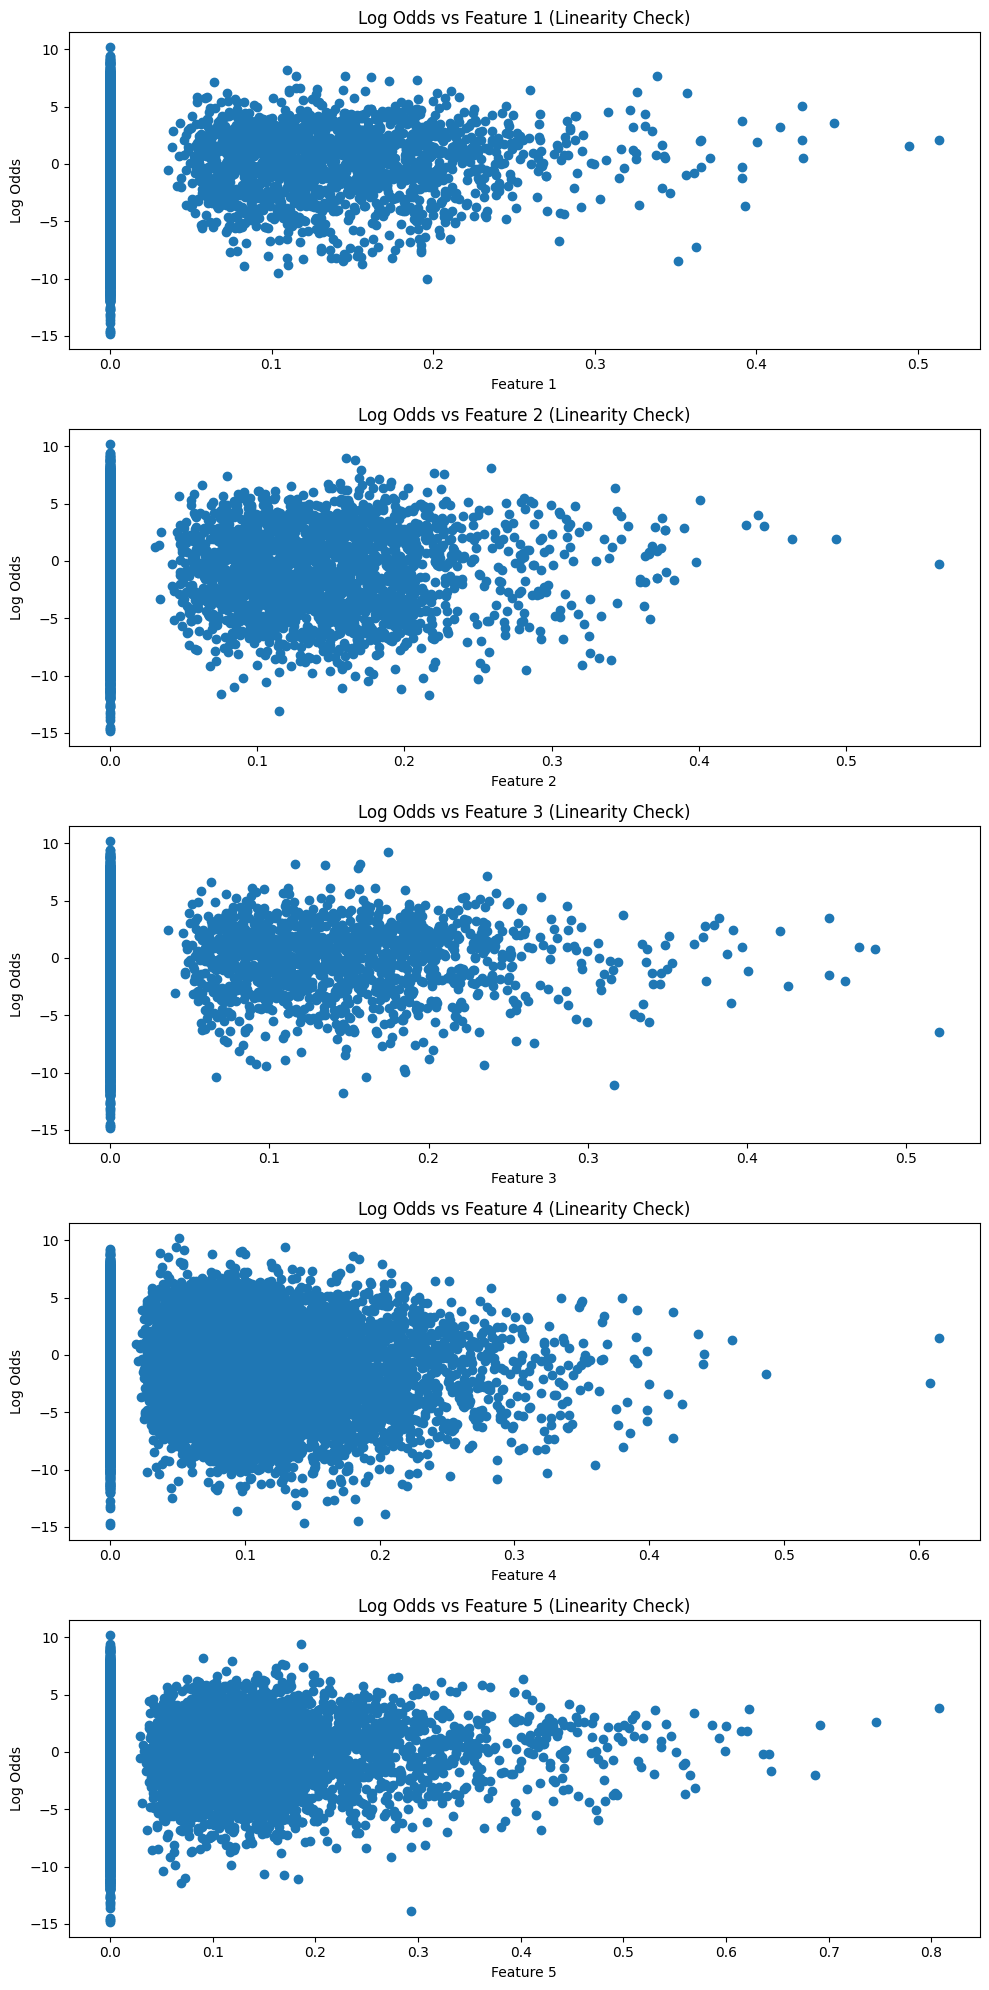

In [ ]:
# Predict the probabilities of the positive class (class 1) using statsmodels
y_pred_prob = logit_results.predict(X_train_sm)

# Log-odds: log(p / (1 - p))
log_odds = np.log(y_pred_prob / (1 - y_pred_prob))

# Number of features to visualize
num_features_to_plot = min(5, X_train_tfidf.shape[1])  # Ensure we don't exceed available features

# Create subplots
fig, axs = plt.subplots(num_features_to_plot, 1, figsize=(10, 4 * num_features_to_plot))

for feature_index in range(num_features_to_plot):
    axs[feature_index].scatter(X_train_tfidf[:, feature_index].toarray(), log_odds)
    axs[feature_index].set_xlabel(f'Feature {feature_index + 1}')
    axs[feature_index].set_ylabel('Log Odds')
    axs[feature_index].set_title(f'Log Odds vs Feature {feature_index + 1} (Linearity Check)')

plt.tight_layout()
plt.show()

In [ ]:
# Create interaction terms for Box-Tidwell test
X_train_sm = X_train_tfidf.toarray()
log_X_train = np.log(X_train_sm + 1e-6)  # Adding a small value to avoid log(0)
interaction_terms = X_train_sm * log_X_train

# Create a new DataFrame with original features and interaction terms
X_box_tidwell = np.hstack((X_train_sm, interaction_terms))

# Fit logistic regression with the interaction terms
logit_box_tidwell = sm.Logit(y_train, sm.add_constant(X_box_tidwell))
result_box_tidwell = logit_box_tidwell.fit()

# Summary of the results
print(result_box_tidwell.summary())


Optimization terminated successfully.
         Current function value: 0.329163
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                39664
Model:                          Logit   Df Residuals:                    38663
Method:                           MLE   Df Model:                         1000
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                  0.5251
Time:                        14:39:47   Log-Likelihood:                -13056.
converged:                       True   LL-Null:                       -27492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0202      0.258      3.955      0.000       0.515       1.526
x1            -1.0884      1.

Confusion Matrix

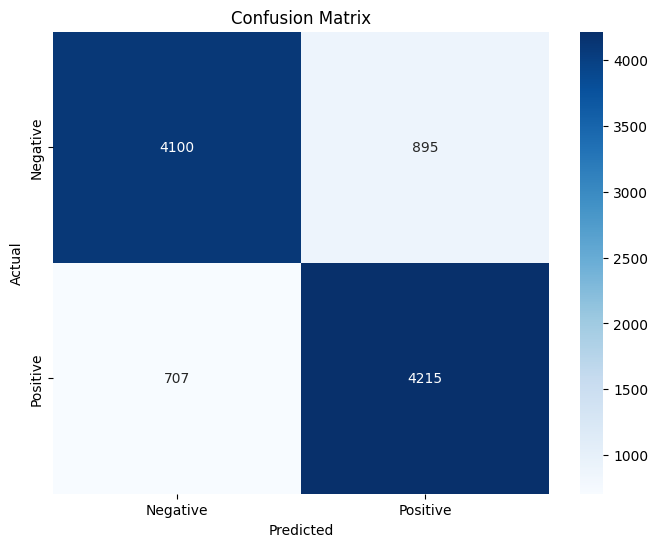

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Since the model has more true positives and true negatives than false positives and false negatives, its suggests a decent level of accuracy.

ROC Curve and AUC

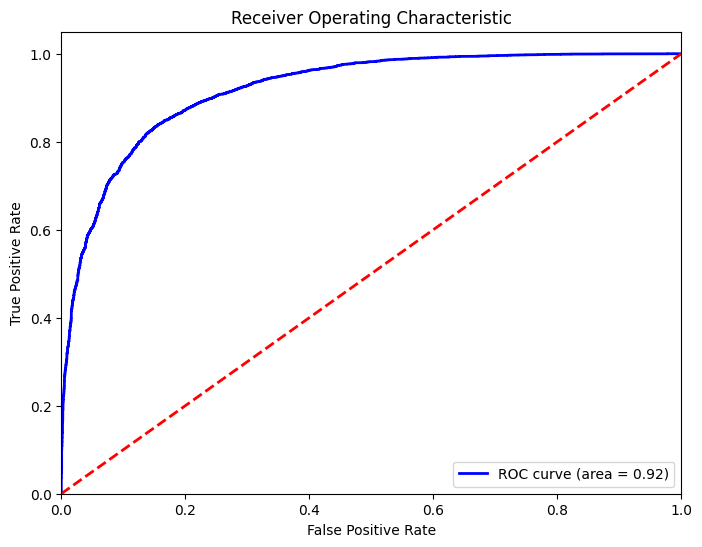

In [ ]:
# ROC Curve
y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


The area under the ROC curve is 0.92 which is very cloase to 1 indicating excellent discrimination ability for the logistic regression model.

Feature Importance

In [ ]:
import pandas as pd
# Get feature names from TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

# Get the coefficients
coefficients = lr_model.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

       Feature  Coefficient  Importance
490      worst   -10.144170   10.144170
472      waste    -8.670741    8.670741
33       awful    -7.817725    7.817725
144  excellent     6.140603    6.140603
50        bore    -6.117407    6.117407
35         bad    -6.007465    6.007465
432   terrible    -5.993838    5.993838
333       poor    -5.462417    5.462417
190      great     5.441476    5.441476
319    perfect     5.273111    5.273111


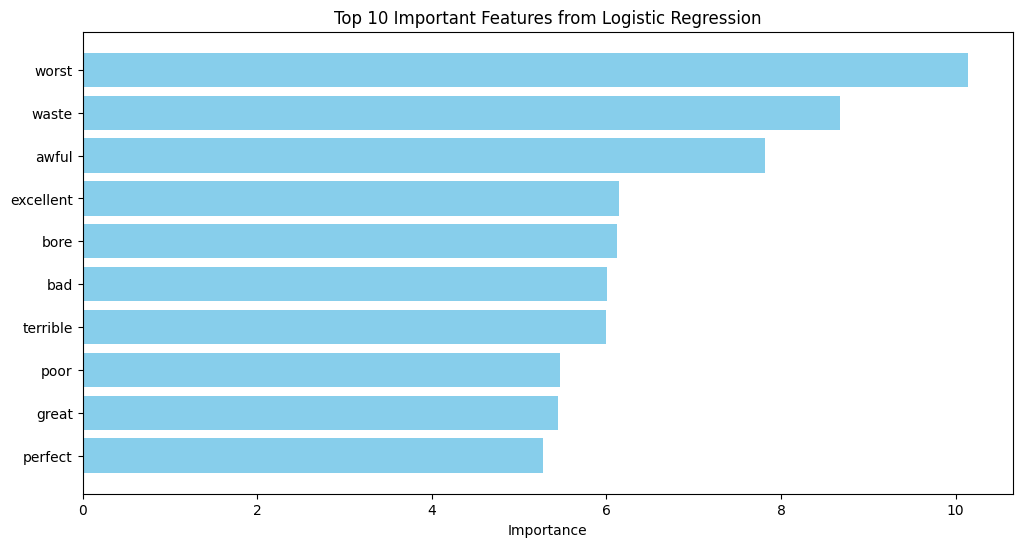

In [ ]:
# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()


Cross-Validation(k-fold cross-validation to ensure that this model's performance is consistent across different subsets of the data.)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%')


Cross-Validation Scores: [0.84558175 0.84419513 0.84154796 0.85062398 0.83724155]
Mean Cross-Validation Score: 84.38%


##Random Forest

1. Independence of Observations: This is a general assumption for most machine learning models, including Random Forest. The observations (rows in your dataset) should be independent of each other.
2. No Need for Feature Scaling: Random Forest is not affected by the scale of the data, so there is no need to standardize or normalize features, unlike models like SVM or Logistic Regression.
3. Handling Multicollinearity: Random Forests are generally robust to multicollinearity, meaning correlated features are handled well without causing much problem.
4. Noisy Data and Outliers: Random Forest is less sensitive to outliers because it builds multiple trees and aggregates the results, so outliers are not as influential in the final model.
5.Feature Importance: RF models automatically evaluate feature importance as part of the model-building process. This can help you understand which features contribute most to the predictions.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

#  Split data into train and test sets
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})  # Adjust mapping based on your dataset
X = df['cleaned_review']  # Use the cleaned reviews for modeling
y = df['label']

In [ ]:
X

,cleaned_review
0,one reviewers mention watch oz episode hook ri...
1,wonderful little production film technique una...
2,think wonderful way spend time hot summer week...
3,basically family little boy jake think zombie ...
4,matteis love time money visually stun film wat...
...,...
49995,think movie right good job creative original f...
49996,bad plot bad dialogue bad act idiotic direct a...
49997,catholic teach parochial elementary school nun...
49998,go disagree previous comment side maltin one s...


In [ ]:
y

,label
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Vectorizing text using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Directly fitting the model and finding accuracy
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
# Classification report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 81.42%
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4995
           1       0.80      0.83      0.82      4922

    accuracy                           0.81      9917
   macro avg       0.81      0.81      0.81      9917
weighted avg       0.81      0.81      0.81      9917



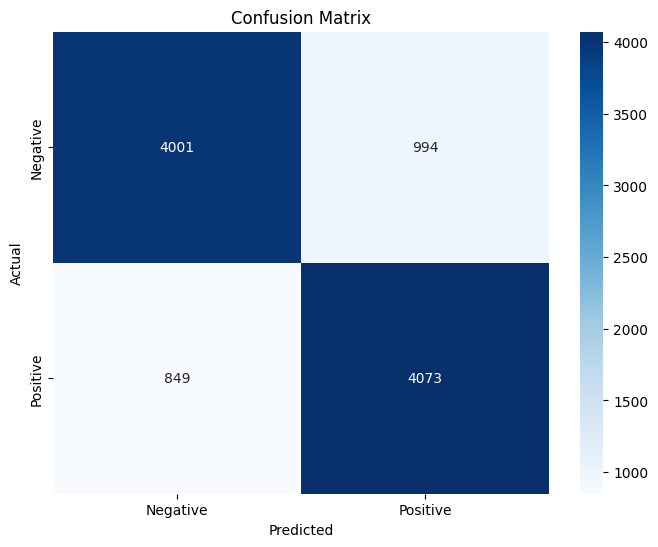

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

ROC AUC score and ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Get the predicted probabilities for the positive class (class 1)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for the positive class

In [ ]:
# Step 2: Compute the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f'Random Forest ROC AUC Score: {roc_auc_rf:.2f}')

Random Forest ROC AUC Score: 0.90


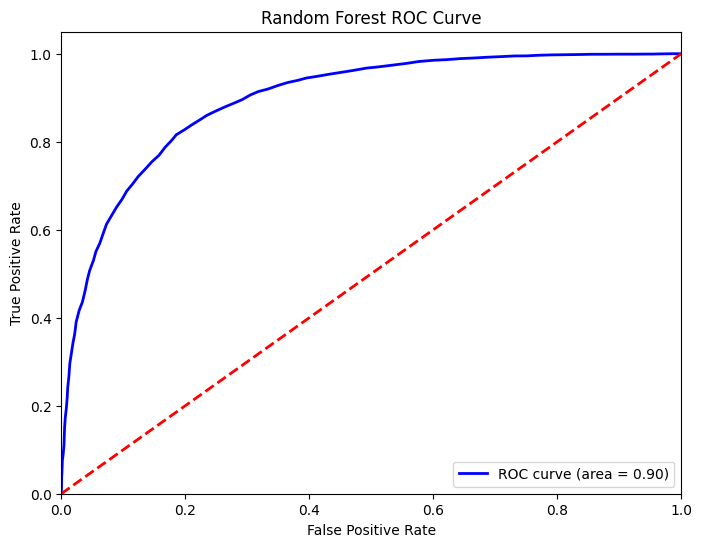

In [ ]:
# Step 3: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
# Get indices of the most important features
indices = np.argsort(importances)[::-1][:10]  # Get the top 10 feature indices

# Print the most important features
print("Top 10 Important Features:")
for f in range(len(indices)):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]:.4f}")

Top 10 Important Features:
1. Feature 35: 0.0366
2. Feature 490: 0.0305
3. Feature 472: 0.0223
4. Feature 190: 0.0223
5. Feature 33: 0.0158
6. Feature 259: 0.0147
7. Feature 144: 0.0128
8. Feature 50: 0.0125
9. Feature 432: 0.0116
10. Feature 298: 0.0102


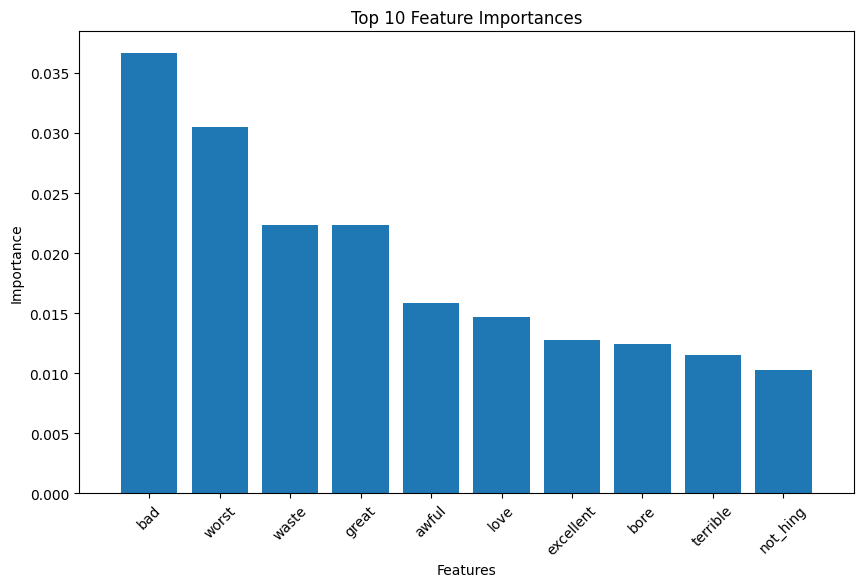

In [ ]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [tfidf.get_feature_names_out()[i] for i in indices], rotation=45)
plt.xlim([-1, len(indices)])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


Feature Importance

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')


Naive Bayes Accuracy: 82.05%


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4995
           1       0.80      0.85      0.82      4922

    accuracy                           0.82      9917
   macro avg       0.82      0.82      0.82      9917
weighted avg       0.82      0.82      0.82      9917



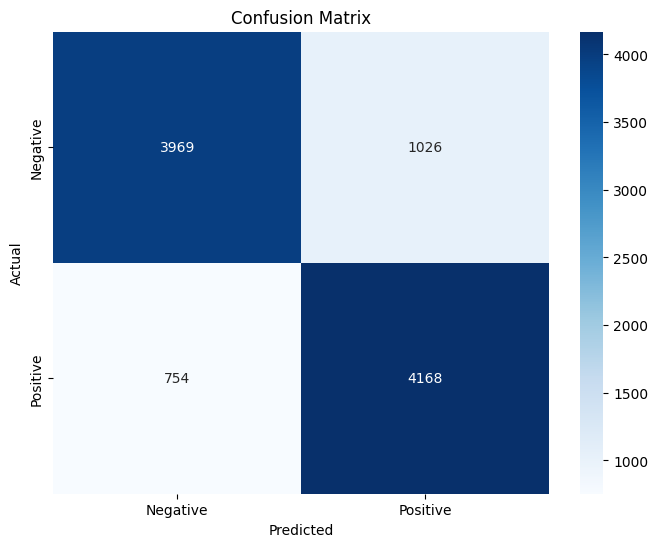

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate ROC AUC score
from sklearn.metrics import roc_auc_score
y_proba = nb_model.predict_proba(X_test_tfidf)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC AUC Score for Naive Bayes: {roc_auc:.2f}")

ROC AUC Score for Naive Bayes: 0.90


In [ ]:
# Feature importance (probabilities of each feature being associated with each class)
feature_probs = nb_model.feature_log_prob_  # Log probabilities
feature_names = tfidf.get_feature_names_out()

In [ ]:
# Display top 10 important features for each class
top_n = 10
for i, class_label in enumerate(nb_model.classes_):
    # Get top features for this class
    top_features = np.argsort(feature_probs[i])[-top_n:][::-1]
    print(f"Top {top_n} features for class '{class_label}':")
    for feature_index in top_features:
        print(f"{feature_names[feature_index]}: {np.exp(feature_probs[i][feature_index]):.4f}")
    print()


Top 10 features for class '0':
movie: 0.0173
film: 0.0149
make: 0.0091
like: 0.0091
one: 0.0089
bad: 0.0084
get: 0.0079
see: 0.0078
would: 0.0078
watch: 0.0072

Top 10 features for class '1':
film: 0.0172
movie: 0.0142
one: 0.0094
see: 0.0089
like: 0.0079
great: 0.0077
make: 0.0077
good: 0.0071
love: 0.0070
time: 0.0069



##Support Vector Machine(SVM)

Support Vector Machines (SVMs) have certain assumptions and
properties that are important to understand when using them:

1. Linear Separability:
The primary assumption of SVM is that the data is or can be
transformed into a linearly separable space. In other words, there exists a hyperplane that can distinctly separate the classes.In our code: We're using a linear kernel, which assumes the data can be separated by a straight hyperplane. If the data is not linearly separable, the model may perform poorly. We can test this assumption by evaluating the model's performance and considering other kernels (like 'rbf' or 'poly') if linear separability does not hold.

2. Scaling the Features: SVMs are sensitive to the scale of the features because the algorithm calculates distances between data points. Features with larger scales can dominate the optimization process.
In our code: We used StandardScaler() to standardize your features, ensuring that they all have a mean of 0 and a standard deviation of 1. This is important for SVM, so you’ve handled this assumption correctly.

3. Margin Maximization: SVM aims to find the hyperplane that maximizes the margin between classes. This assumes that a larger margin contributes to better generalization and improved performance. In our code: The SVM algorithm inherently handles this by optimizing the margin during training. There’s no explicit test for this, but good generalization on unseen data (like our test set) suggests the model is working well.

4. Noisy Data Handling: SVMs are sensitive to noisy data and outliers, as these may influence the position and orientation of the decision boundary. Outliers can have a significant impact on the resulting hyperplane. In our code: We could perform outlier detection or use a different kernel that handles outliers better, like the RBF kernel, or use a soft-margin SVM with a regularization parameter (C) to control the trade-off between maximizing the margin and allowing misclassification.

5. Kernel Function Choice: The choice of the kernel function (linear, polynomial, radial basis function) and its parameters can affect the performance of SVM. The appropriate kernel and parameters depend on the characteristics of the data.In our code: We’ve chosen a linear kernel. If the data is not linearly separable, we may need to experiment with other kernels like 'rbf' (radial basis function) or 'poly' (polynomial).

6. Memory Efficiency: SVMs are memory-efficient due to the use of a subset of training points (support vectors) in decision-making. This can be an advantage in terms of memory usage, but it also assumes that these support vectors are representative of the entire dataset.In our code: SVM inherently selects support vectors, so there’s no action required here. However, we can monitor the number of support vectors by checking svm_model.support_vectors_.


In [ ]:
# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())
from sklearn.svm import LinearSVC

In [ ]:
# Step 2: Fit SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_scaled, y_train)
# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Step 4: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4995
           1       0.82      0.86      0.84      4922

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix
[[4085  910]
 [ 701 4221]]


ROC AUC score cannot be computed with LinearSVC, we have to use SVC with Probability as true. But that method takes a lot of computation time and it requ

Feature Importance(LinearSVC doesn't provide feature importance directly like decision trees or random forests. However, since LinearSVC is a linear model, the importance of each feature can be inferred from the coefficients of the linear decision boundary (weights assigned to each feature).)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the coefficients (weights) of the features from the trained LinearSVC model
feature_importance = np.abs(svm_model.coef_[0])  # Use absolute values of coefficients

# Sort the feature importance in descending order and get the indices
sorted_idx = np.argsort(feature_importance)[::-1]

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

Top 10 most important features:
worst: 0.20865877621231382
waste: 0.16678175767111586
bad: 0.15397911522997476
awful: 0.15011427321316578
great: 0.12677492059654835
bore: 0.11396870273644298
terrible: 0.10752034212306259
excellent: 0.10719855455410039
poor: 0.09087401076640378
not_hing: 0.09011743324271566


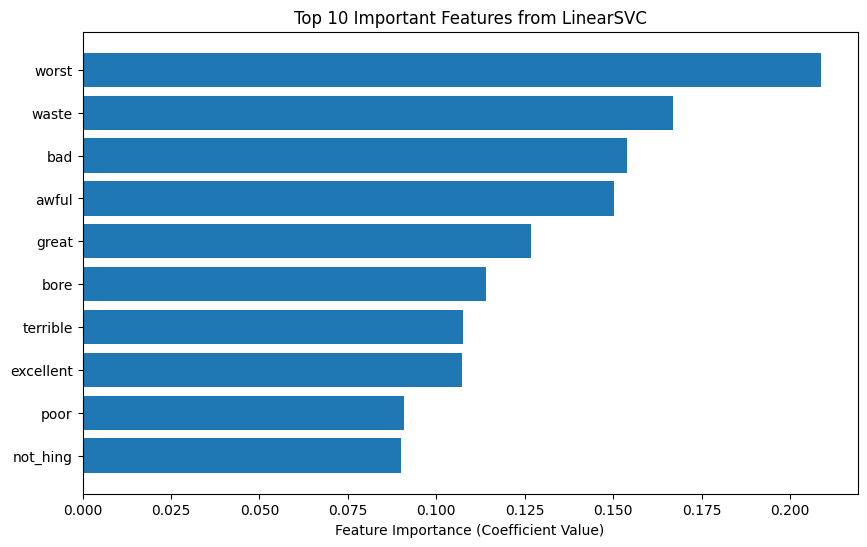

In [ ]:
# Top 10 most important features
top_n = 10
top_features = sorted_idx[:top_n]
print(f"Top {top_n} most important features:")
for i in top_features:
    print(f"{feature_names[i]}: {feature_importance[i]}")

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance[top_features][::-1], align='center')
plt.yticks(range(top_n), np.array(feature_names)[top_features][::-1])
plt.xlabel('Feature Importance (Coefficient Value)')
plt.title('Top 10 Important Features from LinearSVC')
plt.show()


##                     Neural Networks (e.g., LSTM, BERT, etc.)

In [ ]:
df=pd.read_csv("/content/Imdb - data_imdb.csv")

# Show the first few rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Map string labels to integers (1 for positive, 0 for negative)
label_mapping = {'positive': 1, 'negative': 0}
df['label'] = df['sentiment'].map(label_mapping)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# Function to clean the text
def clean_text(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)  # Remove punctuation
    return review

In [ ]:
# Clean the reviews
X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

In [ ]:
# Tokenization
max_words = 5000  # Maximum number of words to keep, based on frequency
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)


In [ ]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad sequences to ensure uniform input size
max_len = 100  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def train_and_evaluate_model(model, X_train_pad, y_train, X_test_pad, y_test):
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    history = model.fit(X_train_pad, y_train,
                        epochs=5,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)  # Set verbose=1 for progress

    # Evaluate on the test set
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    return accuracy


In [ ]:
# Train and evaluate LSTM
lstm_model = create_lstm_model()
lstm_accuracy = train_and_evaluate_model(lstm_model, X_train_pad, y_train, X_test_pad, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 225s 223ms/step - accuracy: 0.7402 - loss: 0.5138 - val_accuracy: 0.8440 - val_loss: 0.3810
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 228s 189ms/step - accuracy: 0.8742 - loss: 0.3117 - val_accuracy: 0.8420 - val_loss: 0.3569
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 197s 184ms/step - accuracy: 0.9003 - loss: 0.2536 - val_accuracy: 0.8543 - val_loss: 0.3650
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 199s 182ms/step - accuracy: 0.9199 - loss: 0.2086 - val_accuracy: 0.8445 - val_loss: 0.3689
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 205s 184ms/step - accuracy: 0.9374 - loss: 0.1661 - val_accuracy: 0.8491 - val_loss: 0.4363
LSTM Model Accuracy: 0.8507


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Replace 'lstm_model' with your actual model variables
# Assuming X_test_pad is your test data, and y_test contains the true labels

# LSTM Predictions
y_pred_lstm_prob = lstm_model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)  # Convert probabilities to binary predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step


In [ ]:
# Evaluate LSTM
print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_lstm_prob):.4f}')

LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4961
           1       0.82      0.90      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[3985  976]
 [ 517 4522]]
ROC AUC Score: 0.9260


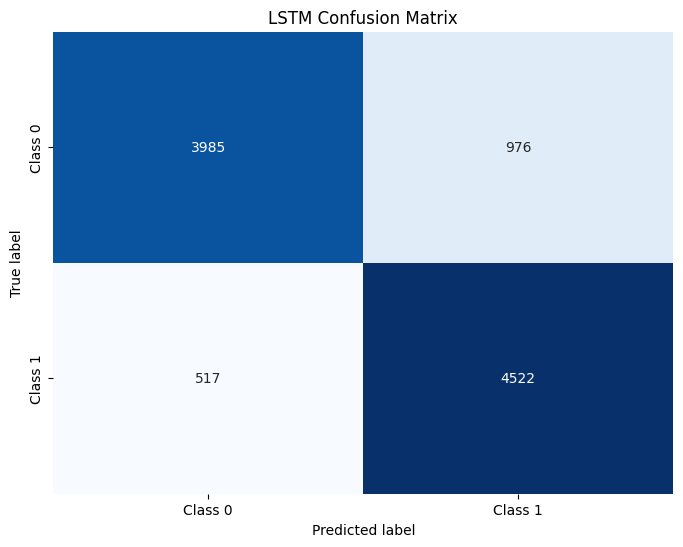

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot for LSTM
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lstm), title='LSTM Confusion Matrix')

In [ ]:
import numpy as np

# Average the predicted probabilities
y_pred_avg_prob = (y_pred_lstm_prob) / 1
y_pred_avg = (y_pred_avg_prob > 0.5).astype(int)

# Evaluate the ensemble model
print("\nEnsemble Model Evaluation:")
print(classification_report(y_test, y_pred_avg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_avg))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_avg_prob):.4f}')


Ensemble Model Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      4961
           1       0.82      0.90      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[3985  976]
 [ 517 4522]]
ROC AUC Score: 0.9260


## BERT

In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Load IMDb dataset (processed)
df = pd.read_csv("/content/cleaned_IMDB_Dataset.csv")

In [ ]:
# Convert sentiment labels to integers (0: Negative, 1: Positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")

# Tokenize datasets
train_encodings = tokenize_data(train_texts)
val_encodings = tokenize_data(val_texts)


In [ ]:
# Create PyTorch Dataset class
class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

In [ ]:
# Create dataset objects
train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)

In [ ]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",       # Output directory
    evaluation_strategy="epoch",  # Evaluate after each epoch
    save_strategy="epoch",        # Save model after each epoch
    per_device_train_batch_size=8, # Batch size
    per_device_eval_batch_size=8,
    num_train_epochs=3,            # Number of epochs
    logging_dir="./logs",         # Logging directory
    logging_steps=500,
    load_best_model_at_end=True,   # Save best model
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


In [ ]:
# Train model
trainer.train()


Epoch,Training Loss,Validation Loss


In [ ]:
# Save fine-tuned model
model.save_pretrained("./bert_imdb_sentiment")
tokenizer.save_pretrained("./bert_imdb_sentiment")

print("BERT training completed and model saved!")

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions using the trained model (assuming 'y_test' and 'y_pred' exist)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
